In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import zscore

plt.style.use('ggplot')

In [3]:
df = pd.read_csv('../../data/benin-malanville.csv')
df.sample(10)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
107448,2021-10-22 14:49,693.1,468.5,330.3,704.3,694.7,38.1,39.6,1.8,2.6,0.5,85.1,12.4,992,0,0.0,57.7,52.6,NaN
145875,2021-11-18 07:16,64.0,67.4,55.5,66.4,66.2,19.3,84.0,1.6,1.9,0.4,240.3,1.2,994,0,0.0,21.7,20.2,NaN
364093,2022-04-18 20:14,-3.0,-0.8,-3.2,0.0,0.0,33.8,29.5,2.2,2.6,0.4,189.4,5.5,991,0,0.0,31.7,31.1,NaN
282959,2022-02-21 12:00,867.0,275.2,605.7,876.1,794.3,29.6,12.4,5.1,6.4,0.9,87.0,9.3,997,0,0.0,52.4,39.0,NaN
32392,2021-08-31 11:53,623.2,107.4,511.8,609.5,609.7,29.7,61.5,2.6,3.4,0.6,235.1,12.0,994,0,0.0,59.2,51.4,NaN
272136,2022-02-13 23:37,-3.6,-0.8,-4.2,0.0,0.0,21.6,44.2,0.0,0.0,0.0,0.0,0.0,996,0,0.0,19.5,18.4,NaN
15059,2021-08-19 11:00,263.1,0.9,261.6,261.8,261.7,23.6,93.8,3.3,4.4,0.6,233.1,10.1,998,0,0.0,34.1,31.9,NaN
519305,2022-08-04 15:06,237.0,1.1,235.5,233.3,231.1,25.3,83.5,2.4,2.9,0.4,270.8,4.6,994,0,0.0,38.2,34.9,NaN
22926,2021-08-24 22:07,-0.8,-0.2,-0.8,0.0,0.0,22.8,95.5,3.7,4.6,0.6,243.4,8.7,994,0,0.1,23.4,22.9,NaN
431332,2022-06-04 12:53,899.0,462.7,426.6,801.0,797.6,36.0,43.2,2.3,3.1,0.4,231.1,23.0,994,0,0.0,69.1,61.6,NaN


In [70]:
df.describe(include='number')

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,242093.000000,242093.000000,242093.000000,242093.000000,242093.000000,242093.000000,242093.000000,242093.000000,242093.000000,242093.000000,242093.000000,242093.000000,242093.000000,242093.000000,242093.000000,242093.000000,242093.000000,0.0
mean,502.591308,349.529231,245.121881,492.056452,475.542217,31.245555,45.315841,2.797806,3.715448,0.586031,159.373288,11.886563,994.110796,0.001995,0.000877,47.080868,41.979189,NaN
std,297.661351,277.580920,143.011246,302.718409,292.722457,5.493816,27.119694,1.545145,1.905007,0.250104,95.549997,6.242843,2.646598,0.044622,0.030336,12.379592,10.518312,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.500000,8.400000,NaN
25%,234.200000,56.900000,139.500000,213.700000,206.900000,27.600000,18.600000,1.700000,2.400000,0.400000,76.000000,8.500000,992.000000,0.000000,0.000000,38.500000,34.700000,NaN
50%,509.600000,340.800000,225.200000,490.800000,473.700000,31.400000,44.000000,2.700000,3.600000,0.600000,157.300000,11.400000,994.000000,0.000000,0.000000,47.600000,42.100000,NaN
75%,777.100000,594.900000,331.800000,772.000000,743.900000,35.500000,68.100000,3.800000,4.900000,0.700000,240.400000,14.700000,996.000000,0.000000,0.000000,56.100000,49.200000,NaN
max,1000.000000,952.300000,759.200000,1109.900000,1052.000000,43.800000,100.000000,16.000000,22.300000,3.400000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [5]:
# Check for missing values
df.isna().sum()


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [ ]:
# Calculate the percentage of missing values for each column
missing_percentage = (df.isna().sum() / len(df)) * 100

# List columns with more than 5% missing values
columns_with_nulls = missing_percentage[missing_percentage > 5]
print("Columns with more than 5% missing values:")
print(columns_with_nulls)

# Drop columns with na values
df = df.dropna(subset=['GHI', 'DNI','DHI', 'ModA', 'ModB','WS', 'WSgust']).copy()
df = df.reindex().copy()

# remove incorrect entries for GHI, the possible values for Global Horizontal Irradiance (GHI) are between 0 and 1000 W/m²
df = df[(df['GHI'] >= 0) & (df['GHI'] <= 1000)].copy()
# remove incorrect entries for DNI, the possible values for Direct Normal Irradiance (DNI) are between 0 and 1000 W/m²
df = df[(df['DNI'] >= 0) & (df['DNI'] <= 1000)].copy()
# remove incorrect entries for DHI, the possible values for Diffuse Horizontal Irradiance (DHI) are between 0 and 1000 W/m²
df = df[(df['DHI'] >= 0) & (df['DHI'] <= 1000)].copy()


Columns with more than 5% missing values:
Comments    100.0
dtype: float64


In [52]:
df.shape

(242093, 19)

In [51]:
# Compute Z-scores for GHI, DNI, and DHI, 'ModA', 'ModB', 'WS', and 'WSgust'
z_scores = zscore(df[['GHI', 'DNI','DHI', 'ModA', 'ModB','WS', 'WSgust']])
# Create a DataFrame for Z-scores to align indices
z_scores_df = pd.DataFrame(z_scores, columns=['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust'], index=df.index)

# Identify outliers using Z-scores
# A Z-score greater than 3 or less than -3 is typically considered an outlier
# Filter the DataFrame to get the outliers
outliers = df[np.abs(z_scores_df) > 3].any(axis=1)

# Display the outliers
print("Outliers based on Z-scores:")
outliers

Outliers based on Z-scores:


413       False
414       False
415       False
416       False
417       False
          ...  
525158    False
525160    False
525166    False
525167    False
525170    False
Length: 242093, dtype: bool

In [53]:
# Drop rows with outliers
df_cleaned = df.loc[~outliers].reset_index(drop=True).copy()

In [54]:
# Exporting the cleaned DataFrame to a CSV file
df_cleaned.to_csv('../../data/benin-cleaned.csv', index=False)

In [58]:
df_cleaned.shape

(241109, 18)

In [56]:
# Convert the 'Timestamp' column to datetime format
df_cleaned['Timestamp'] = pd.to_datetime(df_cleaned['Timestamp'])
df_cleaned.set_index('Timestamp', inplace=True)

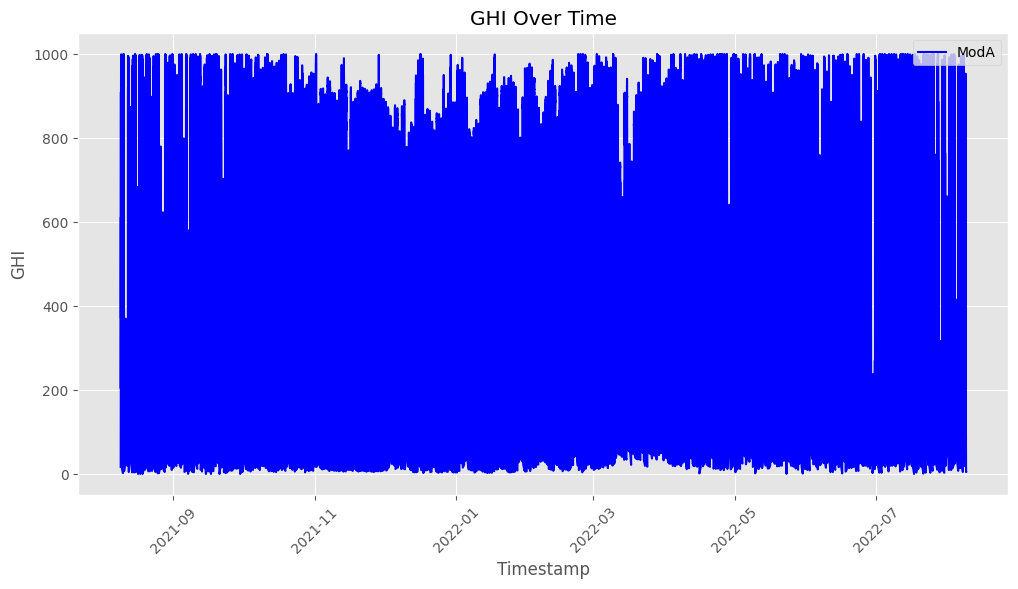

In [59]:

# Plot GHI over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_cleaned.index, y=df_cleaned['GHI'], label='ModA', color='blue')
plt.title("GHI Over Time")
plt.xticks(rotation=45)
plt.show()

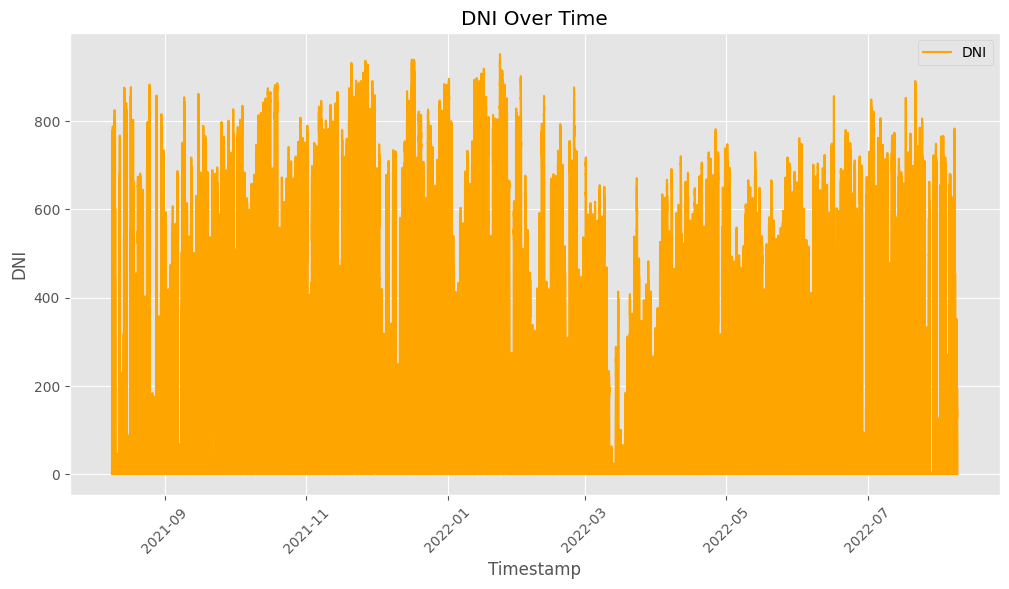

In [60]:
# Plot DNI over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_cleaned.index, y=df_cleaned['DNI'], label='DNI', color='orange')
plt.title("DNI Over Time")
plt.xticks(rotation=45)
plt.show()

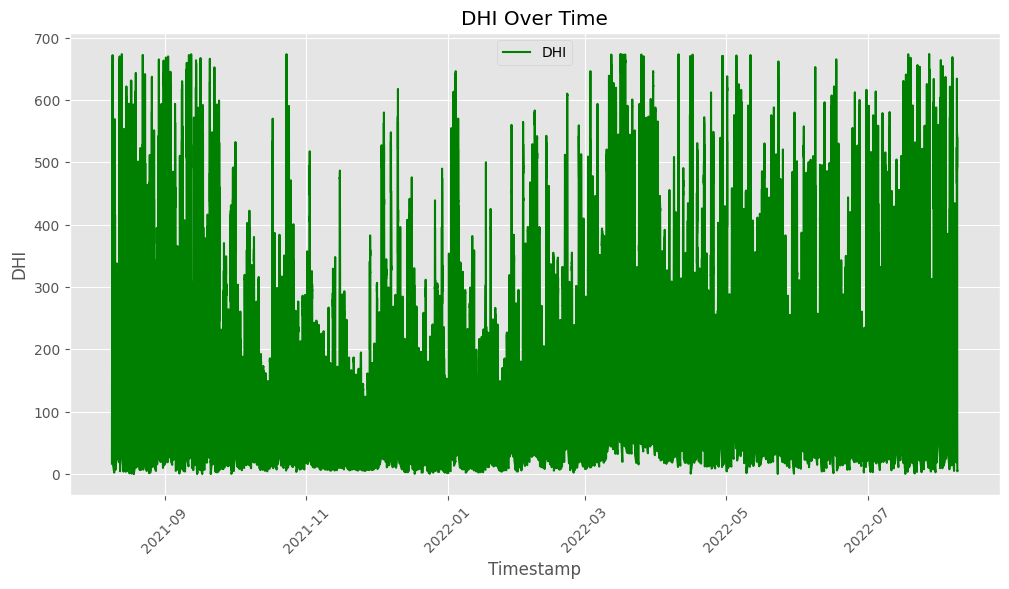

In [62]:
# Plot DHI over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_cleaned.index, y=df_cleaned['DHI'], label='DHI', color='green')
plt.title("DHI Over Time")
plt.xticks(rotation=45)
plt.show()

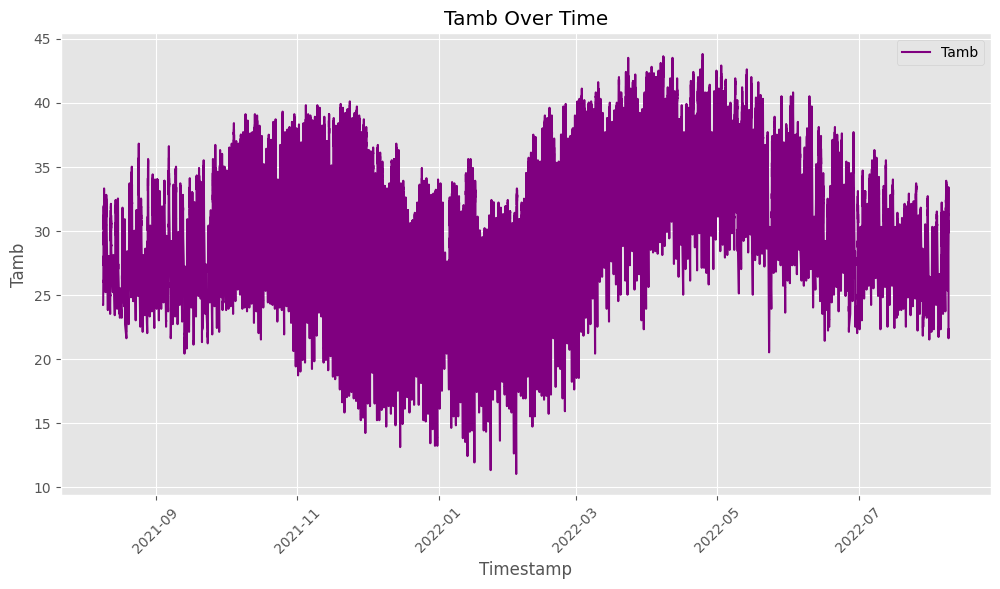

In [63]:
# Plot Tamb  over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_cleaned.index, y=df_cleaned['Tamb'], label='Tamb', color='purple')
plt.title("Tamb Over Time")
plt.xticks(rotation=45)
plt.show()

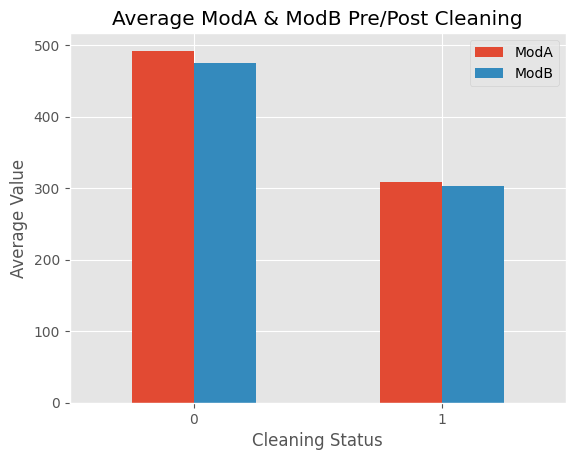

In [64]:
# Group by 'Cleaning' and calculate the mean of ModA and ModB
mod_means = df_cleaned.groupby('Cleaning')[['ModA', 'ModB']].mean().reset_index()

# Plot the averages
mod_means.plot(x='Cleaning', y=['ModA', 'ModB'], kind='bar')
plt.title('Average ModA & ModB Pre/Post Cleaning')
plt.ylabel('Average Value')
plt.xlabel('Cleaning Status')
plt.xticks(rotation=0)
plt.show()

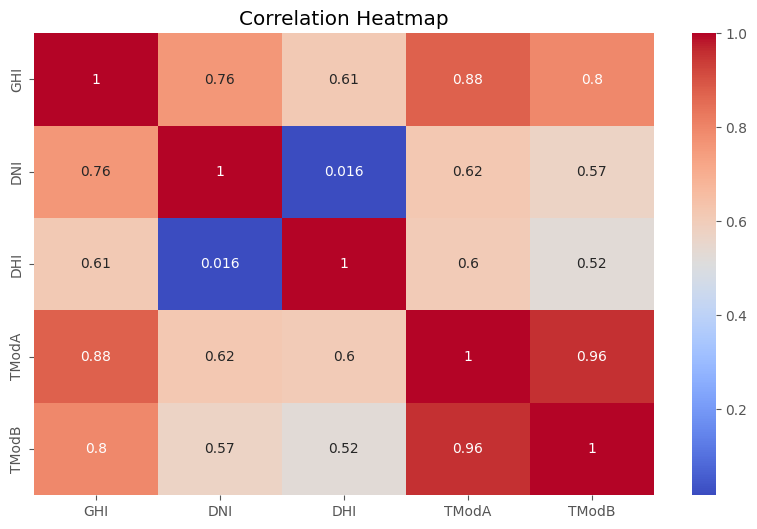

In [65]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

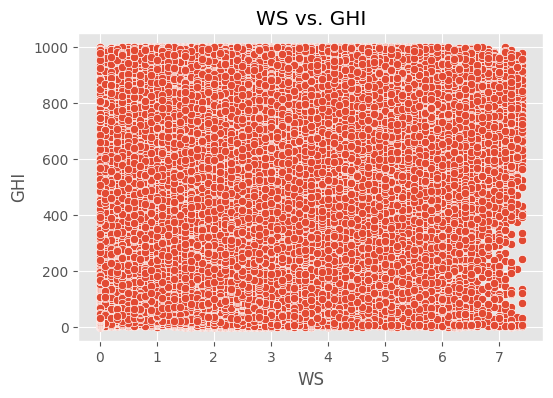

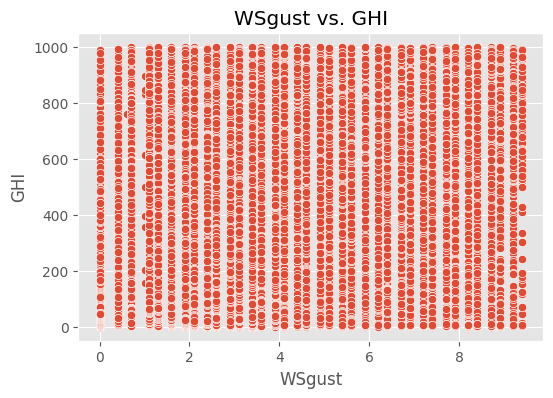

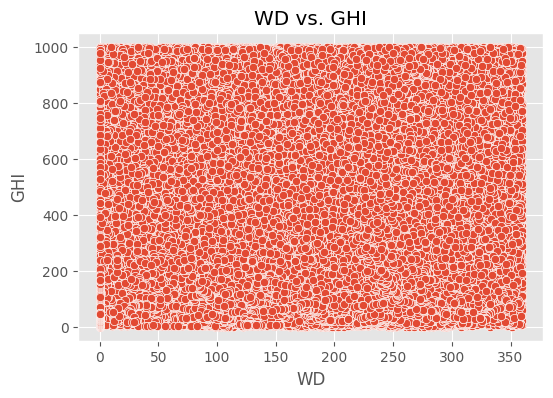

In [66]:
# Scatter plot: WS vs. GHI
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df_cleaned['WS'], y=df_cleaned['GHI'])
plt.title('WS vs. GHI')
plt.xlabel('WS')
plt.ylabel('GHI')
plt.show()

# Scatter plot: WSgust vs. GHI
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df_cleaned['WSgust'], y=df_cleaned['GHI'])
plt.title('WSgust vs. GHI')
plt.xlabel('WSgust')
plt.ylabel('GHI')
plt.show()

# Scatter plot: WD vs. GHI
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df_cleaned['WD'], y=df_cleaned['GHI'])
plt.title('WD vs. GHI')
plt.xlabel('WD')
plt.ylabel('GHI')
plt.show()

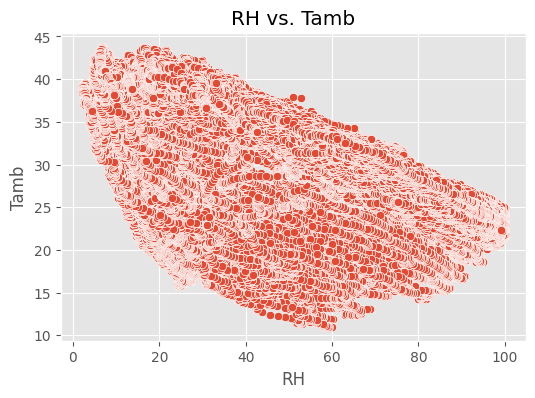

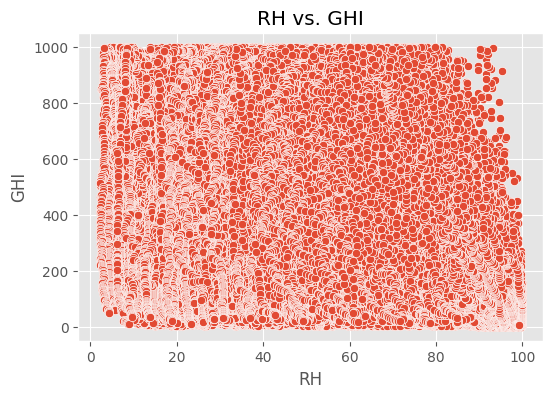

In [67]:
# Scatter plot: RH vs. Tamb
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df_cleaned['RH'], y=df_cleaned['Tamb'])
plt.title('RH vs. Tamb')
plt.xlabel('RH')
plt.ylabel('Tamb')
plt.show()

# Scatter plot: RH vs. GHI
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df_cleaned['RH'], y=df_cleaned['GHI'])
plt.title('RH vs. GHI')
plt.xlabel('RH')
plt.ylabel('GHI')
plt.show()

In [71]:
# Calculate and print correlation coefficients
corr_rh_tamb = df_cleaned['RH'].corr(df_cleaned['Tamb'])
corr_rh_ghi = df_cleaned['RH'].corr(df_cleaned['GHI'])
print(f"Correlation between RH and Tamb: {corr_rh_tamb:.2f}")
print(f"Correlation between RH and GHI: {corr_rh_ghi:.2f}")

Correlation between RH and Tamb: -0.50
Correlation between RH and GHI: -0.34


<Figure size 800x800 with 0 Axes>

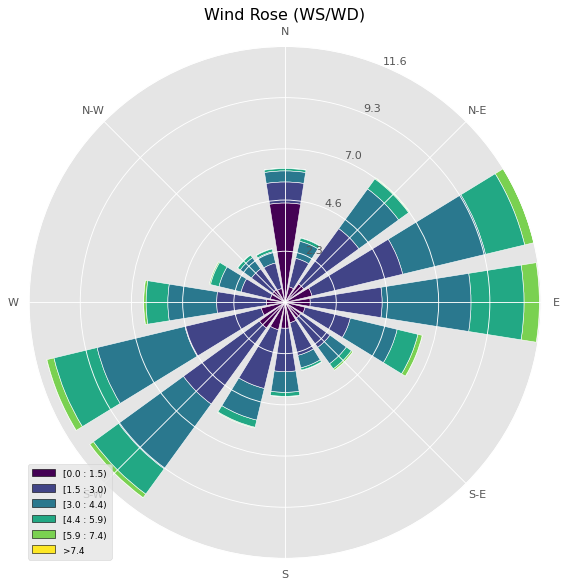

In [68]:
from windrose import WindroseAxes

# Wind rose plot for Wind Speed (WS) and Wind Direction (WD)
plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax()
ax.bar(df_cleaned['WD'], df_cleaned['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_title('Wind Rose (WS/WD)')
ax.set_legend()
plt.show()

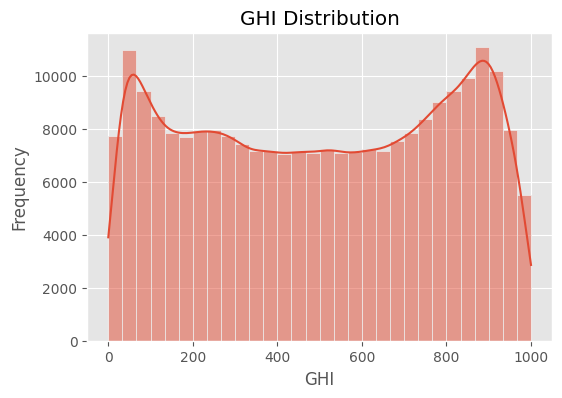

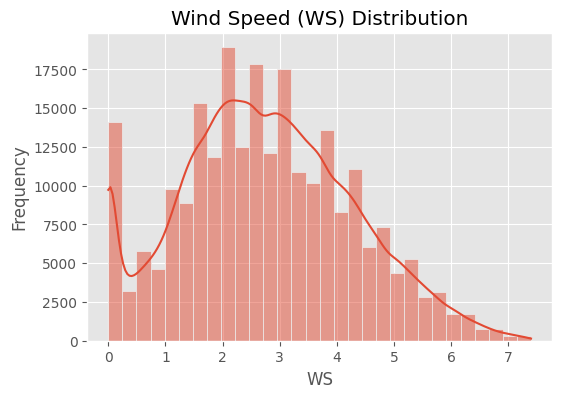

In [69]:
# Histogram for GHI
plt.figure(figsize=(6, 4))
sns.histplot(df_cleaned['GHI'], bins=30, kde=True)
plt.title("GHI Distribution")
plt.xlabel("GHI")
plt.ylabel("Frequency")
plt.show()

# Histogram for WS
plt.figure(figsize=(6, 4))
sns.histplot(df_cleaned['WS'], bins=30, kde=True)
plt.title("Wind Speed (WS) Distribution")
plt.xlabel("WS")
plt.ylabel("Frequency")
plt.show()

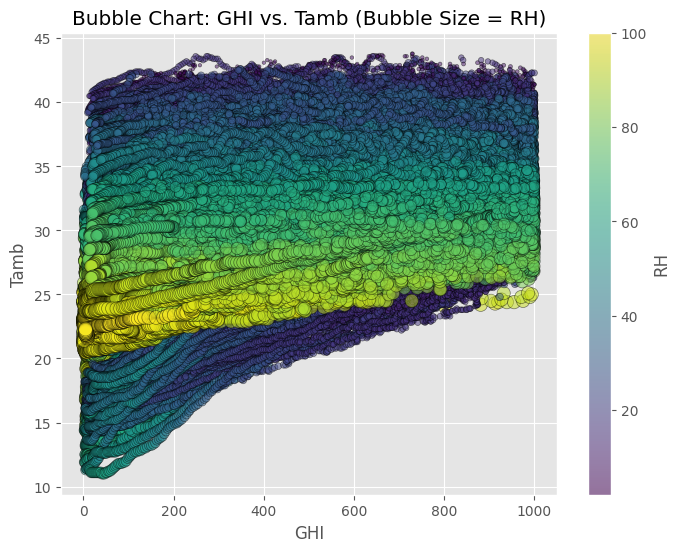

In [72]:
# Bubble chart: GHI vs. Tamb, bubble size = RH
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned['GHI'], df_cleaned['Tamb'], 
            s=df_cleaned['RH'],  # Bubble size
            alpha=0.5, c=df_cleaned['RH'], cmap='viridis', edgecolor='k')
plt.title('Bubble Chart: GHI vs. Tamb (Bubble Size = RH)')
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.colorbar(label='RH')
plt.show()